# Segmentation
**https://www.geeksforgeeks.org/image-segmentation-using-pythons-scikit-image-module/**

**https://scikit-image.org/docs/stable/auto_examples/segmentation/index.html**

### Grayscale and HSV

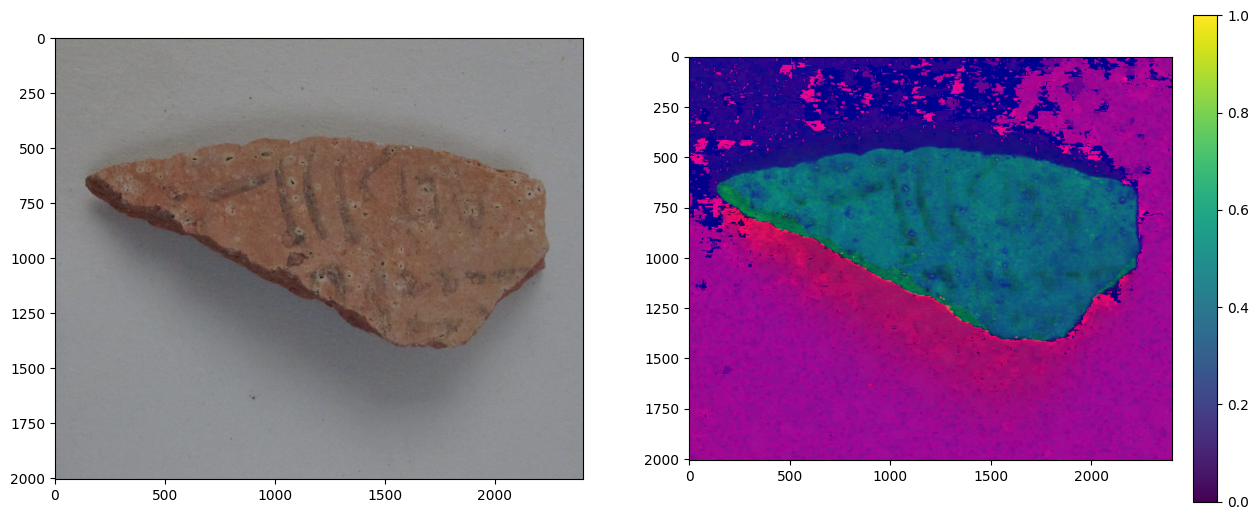

In [42]:
# Importing Necessary Libraries
from skimage import data
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt

# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

# Sample Image of scikit-image package
coffee = skimage.io.imread("original-1-12.JPG")
plt.subplot(1, 2, 1)

# Displaying the sample image
plt.imshow(coffee)

# Converting RGB Image to HSV Image
hsv_coffee = rgb2hsv(coffee)
gray_coffee = rgb2gray(coffee)
plt.subplot(1, 2, 2)

# Displaying the sample image - HSV Format
hsv_coffee_colorbar = plt.imshow(hsv_coffee)

# Adjusting colorbar to fit the size of the image
plt.colorbar(hsv_coffee_colorbar, fraction=0.046, pad=0.04)


### Global Thresholding

(400, 600, 3)


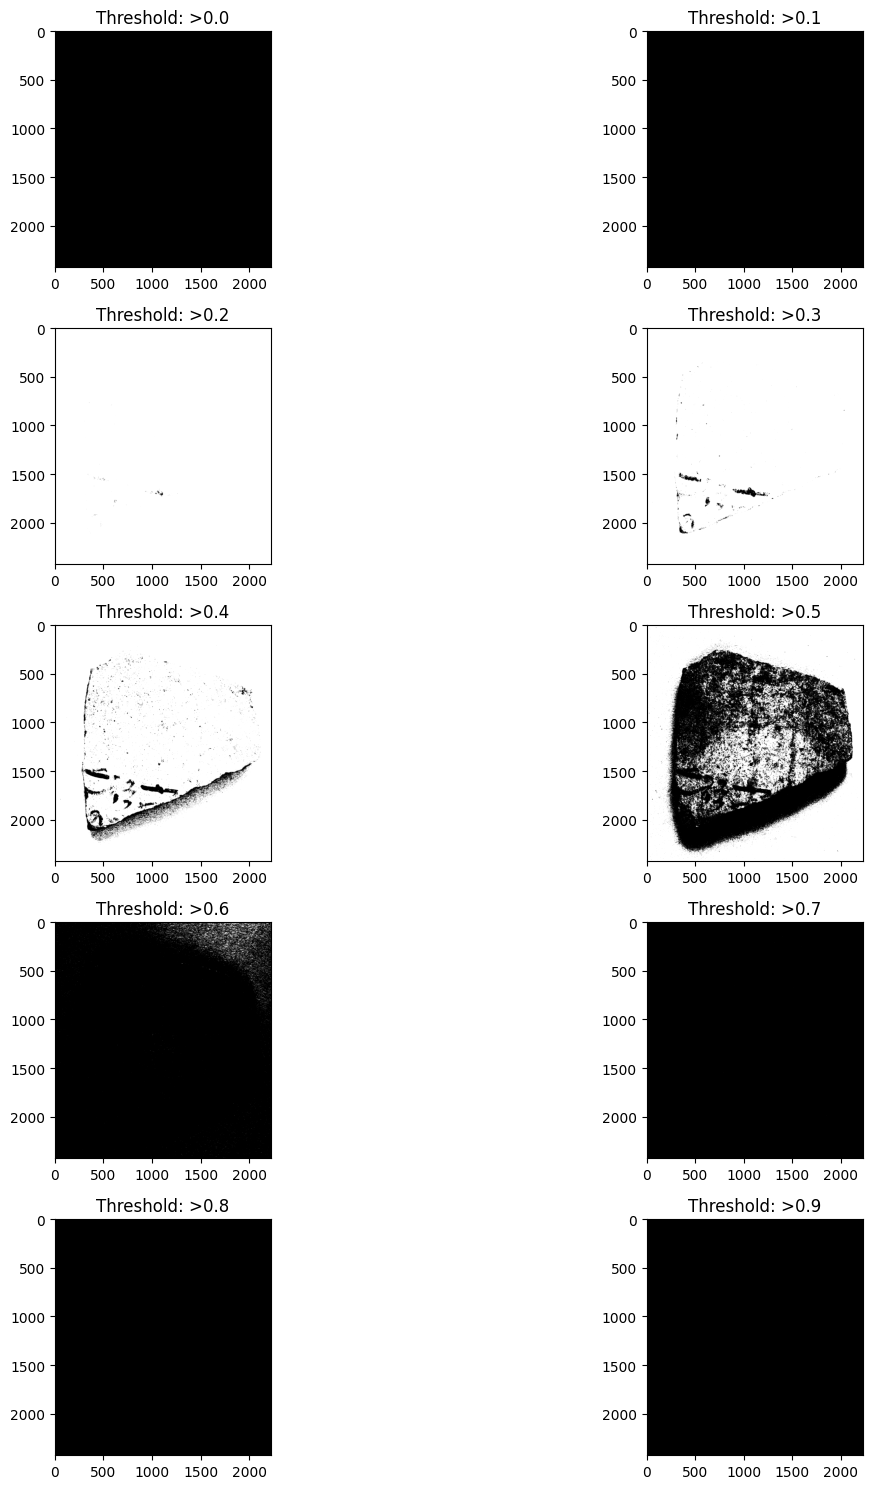

In [16]:
# Importing Necessary Libraries
# Displaying the sample image - Monochrome Format
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import skimage

# Sample Image of scikit-image package
# coffee = data.coffee()
coffee = skimage.io.imread("original-1-7.JPG")
gray_coffee = rgb2gray(coffee)

# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

for i in range(10):
  
  # Iterating different thresholds
  binarized_gray = (gray_coffee > i*0.1)*1
  plt.subplot(5,2,i+1)
  
  # Rounding of the threshold
  # value to 1 decimal point
  plt.title("Threshold: >"+str(round(i*0.1,1)))
  
  # Displaying the binarized image
  # of various thresholds
  plt.imshow(binarized_gray, cmap = 'gray')
  
plt.tight_layout()


### Local/Adaptive Thresholding
**https://scikit-image.org/docs/stable/api/skimage.filters.html**

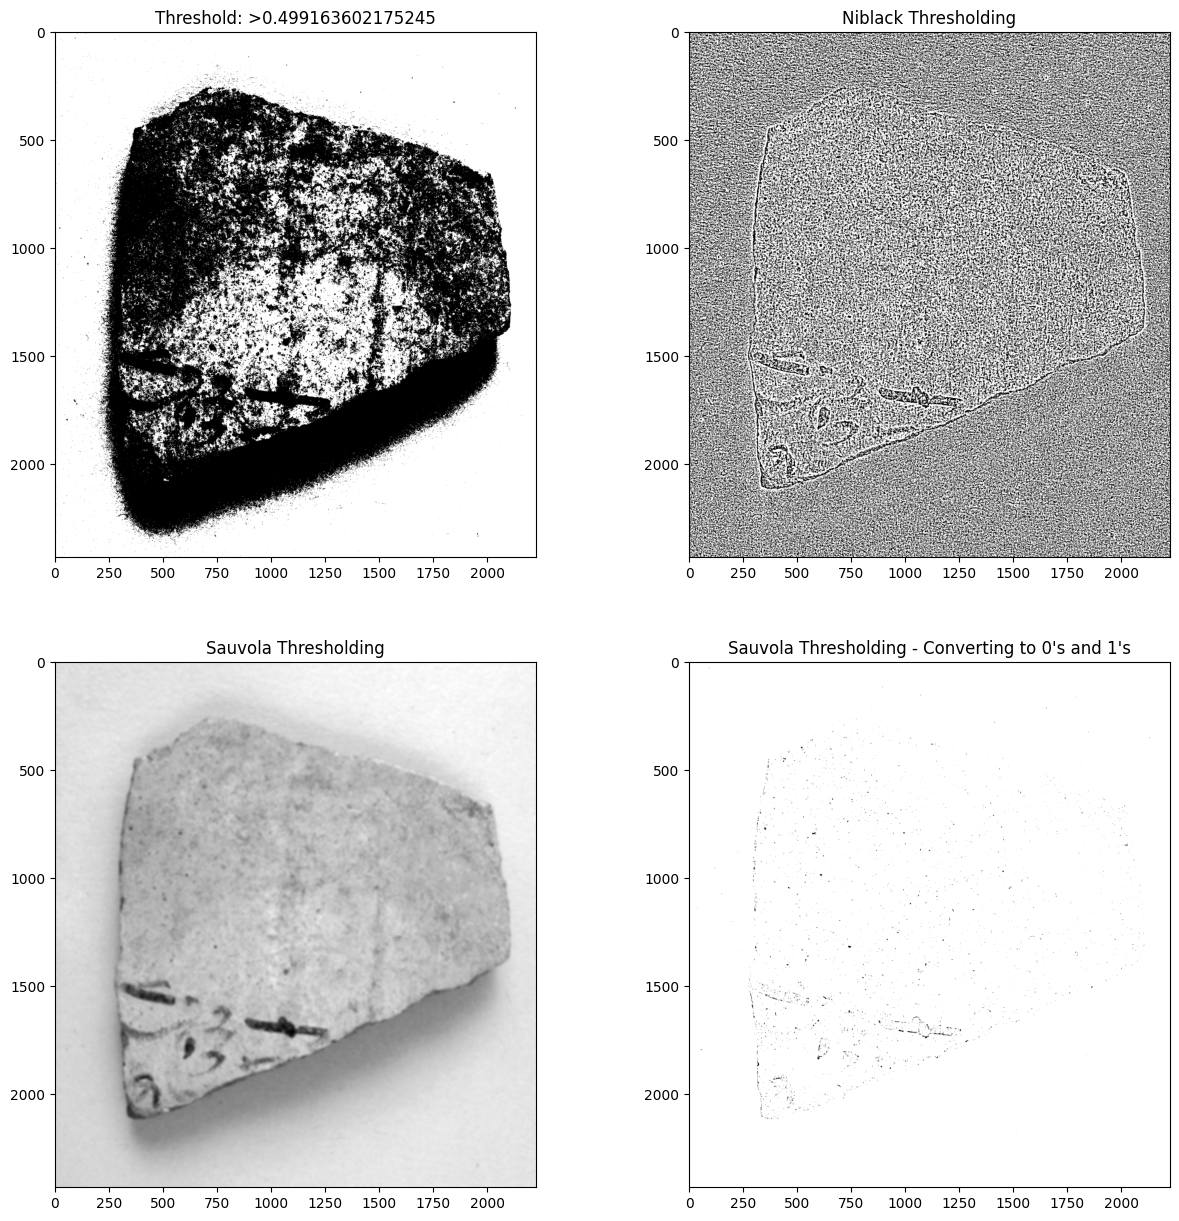

In [17]:
# Importing necessary libraries
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Setting plot size to 15, 15
plt.figure(figsize=(15, 15))

# Sample Image of scikit-image package
coffee = skimage.io.imread("original-1-7.JPG")
gray_coffee = rgb2gray(coffee)

# Computing Otsu's thresholding value
threshold = filters.threshold_otsu(gray_coffee)

# Computing binarized values using the obtained
# threshold
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(2,2,1)
plt.title("Threshold: >"+str(threshold))

# Displaying the binarized image
plt.imshow(binarized_coffee, cmap = "gray")

# Computing Ni black's local pixel
# threshold values for every pixel
threshold = filters.threshold_niblack(gray_coffee)

# Computing binarized values using the obtained 
# threshold
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(2,2,2)
plt.title("Niblack Thresholding")

# Displaying the binarized image
plt.imshow(binarized_coffee, cmap = "gray")

# Computing Sauvola's local pixel threshold
# values for every pixel - Not Binarized
threshold = filters.threshold_sauvola(gray_coffee)
plt.subplot(2,2,3)
plt.title("Sauvola Thresholding")

# Displaying the local threshold values
plt.imshow(threshold, cmap = "gray")

# Computing Sauvola's local pixel
# threshold values for every pixel - Binarized
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(2,2,4)
plt.title("Sauvola Thresholding - Converting to 0's and 1's")

# Displaying the binarized image
plt.imshow(binarized_coffee, cmap = "gray")


### Chan-Vese segmentation

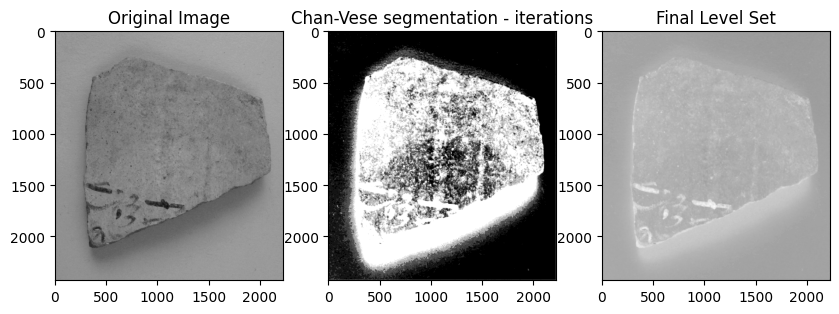

In [19]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data, img_as_float
from skimage.segmentation import chan_vese
fig, axes = plt.subplots(1, 3, figsize=(10, 10))

# Sample Image of scikit-image package
# astronaut = data.astronaut()
astronaut = skimage.io.imread("original-1-7.JPG")
gray_astronaut = rgb2gray(astronaut)

# Computing the Chan VESE segmentation technique
chanvese_gray_astronaut = chan_vese(gray_astronaut,
                                    max_num_iter=100,
                                    extended_output=True)

ax = axes.flatten()

# Plotting the original image
ax[0].imshow(gray_astronaut, cmap="gray")
ax[0].set_title("Original Image")

# Plotting the segmented - 100 iterations image
ax[1].imshow(chanvese_gray_astronaut[0], cmap="gray")
title = "Chan-Vese segmentation - iterations"
format(len(chanvese_gray_astronaut[2]))

ax[1].set_title(title)

# Plotting the final level set
ax[2].imshow(chanvese_gray_astronaut[1], cmap="gray")
ax[2].set_title("Final Level Set")
plt.show()


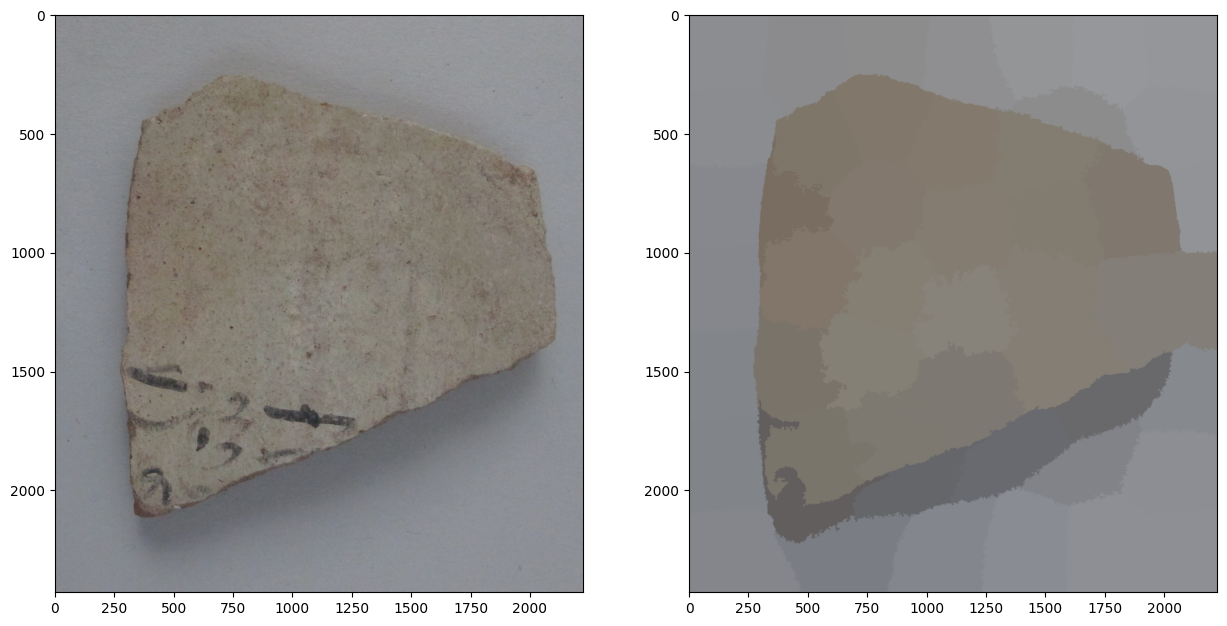

In [24]:
# Importing required libraries
from skimage.segmentation import slic
from skimage.data import astronaut
from skimage.color import label2rgb

# Setting the plot size as 15, 15
plt.figure(figsize=(15,15))

# Sample Image of scikit-image package
# astronaut = astronaut()
astronaut = skimage.io.imread("original-1-7.JPG")

# Applying Simple Linear Iterative
# Clustering on the image
# - 50 segments & compactness = 10
astronaut_segments = slic(astronaut,
                          n_segments=50,
                          compactness=10)
plt.subplot(1,2,1)

# Plotting the original image
plt.imshow(astronaut)
plt.subplot(1,2,2)

# Converts a label image into
# an RGB color image for visualizing
# the labeled regions. 
plt.imshow(label2rgb(astronaut_segments,
                     astronaut,
                     kind = 'avg'))


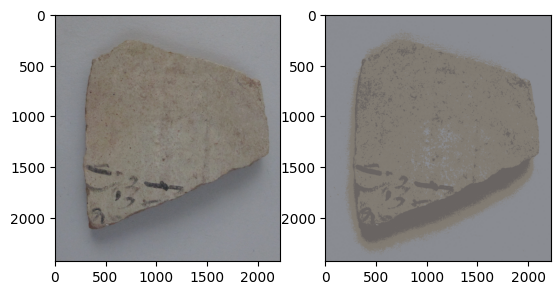

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('original-1-7.JPG')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)

#the below line of code defines the criteria for the algorithm to stop running, 
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy) 
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))


f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image)
axarr[1].imshow(segmented_image)
# plt.imshow(image)
# plt.imshow(image, segmented_image)



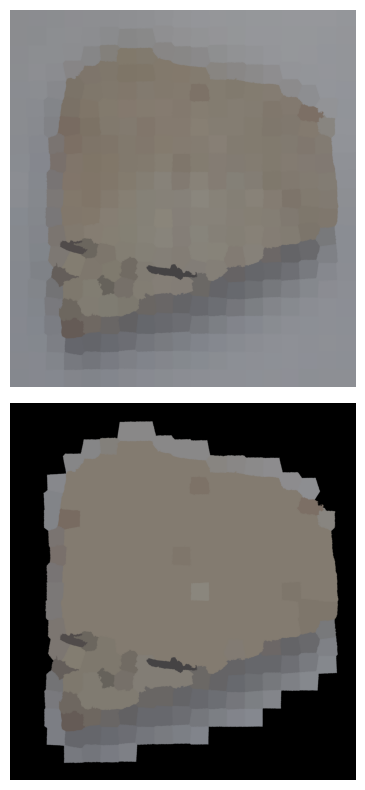

In [ ]:
from skimage import data, segmentation, color
from skimage import graph
from matplotlib import pyplot as plt


img = skimage.io.imread("original-1-7.JPG")

labels1 = segmentation.slic(img, compactness=30, n_segments=400, start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1)
labels2 = graph.cut_threshold(labels1, g, 10)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()

In [12]:
from skimage import data, segmentation, color
from skimage import graph
from matplotlib import pyplot as plt
import skimage

img = skimage.io.imread("original-1-7.JPG")
print(type(image[0][0][0]))
print(img.shape)



labels1 = segmentation.slic(img, compactness=30, n_segments=400, start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()

<class 'numpy.uint8'>
(2430, 2225, 3)


ValueError: Buffer dtype mismatch, expected 'int32_t' but got 'long'

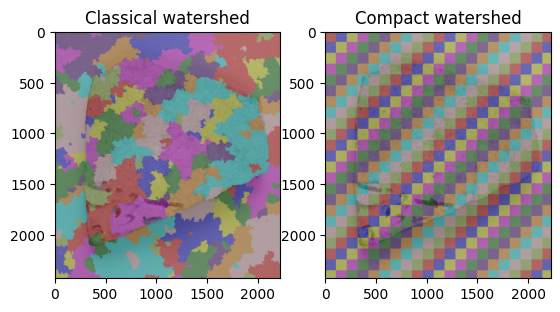

In [7]:
import numpy as np
from skimage import data, util, filters, color
from skimage.segmentation import watershed
import matplotlib.pyplot as plt

# coins = data.coins()
# print(coins.shape)
img = skimage.io.imread("original-1-7.JPG")
coins = color.rgb2gray(img)
# print(img.shape)
edges = filters.sobel(coins)

grid = util.regular_grid(coins.shape, n_points=468)

seeds = np.zeros(coins.shape, dtype=int)
seeds[grid] = np.arange(seeds[grid].size).reshape(seeds[grid].shape) + 1

w0 = watershed(edges, seeds)
w1 = watershed(edges, seeds, compactness=0.01)

fig, (ax0, ax1) = plt.subplots(1, 2)

ax0.imshow(color.label2rgb(w0, coins, bg_label=-1))
ax0.set_title('Classical watershed')

ax1.imshow(color.label2rgb(w1, coins, bg_label=-1))
ax1.set_title('Compact watershed')

plt.show()

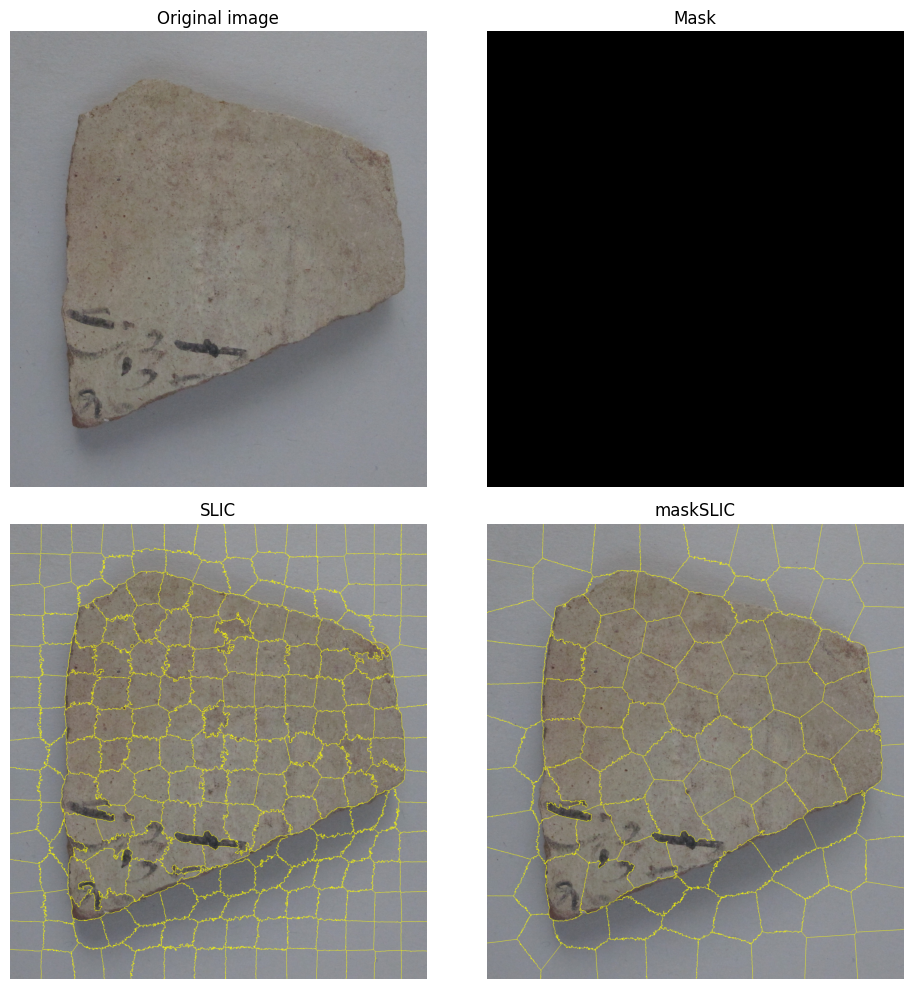

In [ ]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import color
from skimage import morphology
from skimage import segmentation

# Input data
# img = data.immunohistochemistry()
img = skimage.io.imread("original-1-7.JPG")

# Compute a mask
lum = color.rgb2gray(img)
mask = morphology.remove_small_holes(
    morphology.remove_small_objects(lum < 0.7, 500), 500
)

mask = morphology.opening(mask, morphology.disk(3))

# SLIC result
slic = segmentation.slic(img, n_segments=200, start_label=1)

# maskSLIC result
m_slic = segmentation.slic(img, n_segments=100, mask=mask, start_label=1)

# Display result
fig, ax_arr = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))
ax1, ax2, ax3, ax4 = ax_arr.ravel()

ax1.imshow(img)
ax1.set_title('Original image')

ax2.imshow(mask, cmap='gray')
ax2.set_title('Mask')

ax3.imshow(segmentation.mark_boundaries(img, slic))
ax3.contour(mask, colors='red', linewidths=1)
ax3.set_title('SLIC')

ax4.imshow(segmentation.mark_boundaries(img, m_slic))
ax4.contour(mask, colors='red', linewidths=1)
ax4.set_title('maskSLIC')

for ax in ax_arr.ravel():
    ax.set_axis_off()

plt.tight_layout()
plt.show()

/opt/miniconda3/lib/python3.12/site-packages/skimage/segmentation/random_walker_segmentation.py:475: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


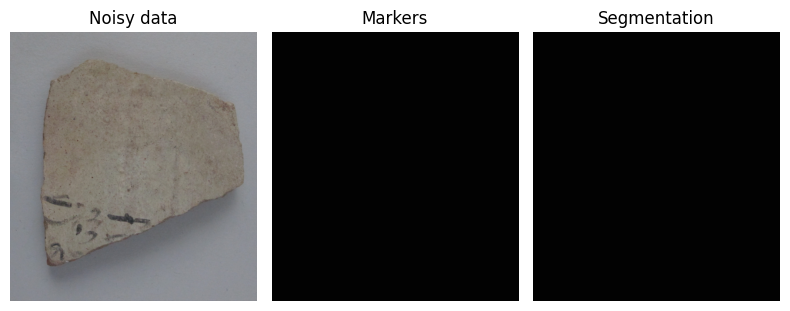

In [76]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
import skimage

# rng = np.random.default_rng()

# Generate noisy synthetic data
# data = skimage.img_as_float(binary_blobs(length=128, rng=1))
data = skimage.io.imread("original-1-7.JPG")
# sigma = 0.35
# data += rng.normal(loc=0, scale=sigma, size=data.shape)
# data = rescale_intensity(data, in_range=(-sigma, 1 + sigma), out_range=(-1, 1))
# print(data.shape)

# The range of the binary image spans over (-1, 1).
# We choose the hottest and the coldest pixels as markers.
markers = np.zeros(data.shape, dtype=np.uint)
markers[data < -0.95] = 1
markers[data > 0.95] = 2

# Run random walker algorithm
labels = random_walker(data, markers, beta=10, mode='bf')

# Plot results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 3.2), sharex=True, sharey=True)
ax1.imshow(data, cmap='gray')
ax1.axis('off')
ax1.set_title('Noisy data')
ax2.imshow(markers, cmap='magma')
ax2.axis('off')
ax2.set_title('Markers')
ax3.imshow(labels, cmap='gray')
ax3.axis('off')
ax3.set_title('Segmentation')

fig.tight_layout()
plt.show()